<a href="https://colab.research.google.com/github/Soumyabrata250/First-Contribution/blob/master/Assignment_mushroomclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #linear mathematics
import pandas as pd # dataset manipulation
import seaborn as sns #visualization

Here we have to perform binary classification. We have to identify whether the mushrooms are edible or poisonous

In [ ]:
url = "https://raw.githubusercontent.com/SrikanthVelpuri/Mushroom-Classification/master/mushrooms.csv"
mushroom = pd.read_csv(url) # dataframe
mushroom 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# Data Gathering and Analysis

In [ ]:
mushroom.shape # number of columns and rows


(8124, 23)

In [ ]:
mushroom.info() #this will give us info about the data we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# to find number of missing values 
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There doesnt seem to be any values missing. So no need to impute. However all columns are in object form. We need to perform data encoding

#Data Preprocessing

In [ ]:
mushroom['class'] = mushroom['class'] == 'e'
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,True,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,True,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,False,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,True,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,True,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,True,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,False,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
#encoding deck

cap_s = {"b": 0, "c": 1, "x":2, "f":3,"k":4,"s":5}
mushroom['cap-shape']= mushroom['cap-shape'].map(cap_s)

cap_surf = {"f": 0, "g": 1, "y":2, "s":3}
mushroom['cap-surface']= mushroom['cap-surface'].map(cap_surf)

cap_c = {"n": 0, "b": 1, "c":2, "g":3, "r":4, "p":5, "u":6,"e":7, "w":8 ,"y":9}
mushroom['cap-color']= mushroom['cap-color'].map(cap_c)

b = {"t": True, "f": False}
mushroom['bruises']= mushroom['bruises'].map(b)

od = {"a": 0, "l": 1, "c":2, "y":3, "f":4, "m":5, "n":6,"p":7, "s":8}
mushroom['odor']= mushroom['odor'].map(od)

gill_a = {"a": 0, "d": 1, "f":2, "n":3}
mushroom['gill-attachment']= mushroom['gill-attachment'].map(gill_a)

gill_s = {"c": 0, "w": 1, "d":2}
mushroom['gill-spacing']= mushroom['gill-spacing'].map(gill_s)

gill_size = {"b": 0, "n": 1}
mushroom['gill-size']= mushroom['gill-size'].map(gill_size)

gill_c = {"k": 0, "n": 1, "b":2, "h":3, "g":4, "r":5, "o":6,"p":7, "u":8 ,"e":9, "w":10, "y": 11}
mushroom['gill-color']= mushroom['gill-color'].map(gill_c)

In [ ]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,2,3,0,True,7,2,0,1,0,e,e,s,s,w,w,p,w,o,p,k,s,u
1,True,2,3,9,True,0,2,0,0,0,e,c,s,s,w,w,p,w,o,p,n,n,g
2,True,0,3,8,True,1,2,0,0,1,e,c,s,s,w,w,p,w,o,p,n,n,m
3,False,2,2,8,True,7,2,0,1,1,e,e,s,s,w,w,p,w,o,p,k,s,u
4,True,2,3,3,False,6,2,1,0,0,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,4,3,0,False,6,0,0,0,11,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,True,2,3,0,False,6,0,0,0,11,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,True,3,3,0,False,6,0,0,0,1,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,False,4,2,0,False,3,2,0,1,2,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
#encoding deck
stalk_s = {"e": 0, "t": 1}
mushroom['stalk-shape']= mushroom['stalk-shape'].map(stalk_s)

stalk_r = {"b": 0, "c": 1, "u":2, "e":3, "z":4, "r":5, "?":6}
mushroom['stalk-root']= mushroom['stalk-root'].map(stalk_r)

stalk_surf_above = {"f": 0, "y": 1, "k":2, "s":3}
mushroom['stalk-surface-above-ring']= mushroom['stalk-surface-above-ring'].map(stalk_surf_above)

stalk_surf_below = {"f": 5, "y": 1, "k":2, "s":7}
mushroom['stalk-surface-below-ring']= mushroom['stalk-surface-below-ring'].map(stalk_surf_below)

stalk_color_above = {"n": 0, "b": 1, "c":2, "g":3, "o": 4, "p":5, "e":6, "w":7, "y":8}
mushroom['stalk-color-above-ring']= mushroom['stalk-color-above-ring'].map(stalk_color_above)

stalk_color_below = {"n": 0, "b": 1, "c":2, "g":3, "o": 4, "p":5, "e":6, "w":7, "y":8}
mushroom['stalk-color-below-ring']= mushroom['stalk-color-below-ring'].map(stalk_color_below)

veil_t = {"p": 0, "u": 1}
mushroom['veil-type']= mushroom['veil-type'].map(veil_t)

veil_color= {"n": 0, "o": 1, "w":2, "y":3}
mushroom['veil-color']= mushroom['veil-color'].map(veil_color)

ring_n = {"n": 0, "o": 1, "t":2}
mushroom['ring-number']= mushroom['ring-number'].map(ring_n)

ring_t = {"c": 0, "e": 1, "f":2, "l":3, "n": 4, "p":5, "s":6, "z":7}
mushroom['ring-type']= mushroom['ring-type'].map(ring_t)

spore_c= {"k": 0, "n": 1, "b":2, "h":3, "r": 4, "o":5, "u":6, "w":7, "y":8}
mushroom['spore-print-color']= mushroom['spore-print-color'].map(spore_c)

ppln = {"a": 0, "c": 1, "n":2, "s":3, "v": 4, "y":5}
mushroom['population']= mushroom['population'].map(ppln)

hab = {"g": 0, "l": 1, "m":2, "p":3, "u": 4, "w":5, "d":6}
mushroom['habitat']= mushroom['habitat'].map(hab)

In [ ]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,2,3,0,True,7,2,0,1,0,0,3,3,7,7,7,0,2,1,5,0,3,4
1,True,2,3,9,True,0,2,0,0,0,0,1,3,7,7,7,0,2,1,5,1,2,0
2,True,0,3,8,True,1,2,0,0,1,0,1,3,7,7,7,0,2,1,5,1,2,2
3,False,2,2,8,True,7,2,0,1,1,0,3,3,7,7,7,0,2,1,5,0,3,4
4,True,2,3,3,False,6,2,1,0,0,1,3,3,7,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,4,3,0,False,6,0,0,0,11,0,6,3,7,4,4,0,1,1,5,2,1,1
8120,True,2,3,0,False,6,0,0,0,11,0,6,3,7,4,4,0,0,1,5,2,4,1
8121,True,3,3,0,False,6,0,0,0,1,0,6,3,7,4,4,0,1,1,5,2,1,1
8122,False,4,2,0,False,3,2,0,1,2,1,6,3,2,7,7,0,2,1,1,7,4,1


In [ ]:
drop_list=['veil-type']

mushroom = mushroom.drop(columns=drop_list) #remvoing veil-type as it is unnecessary

#Data Visualization

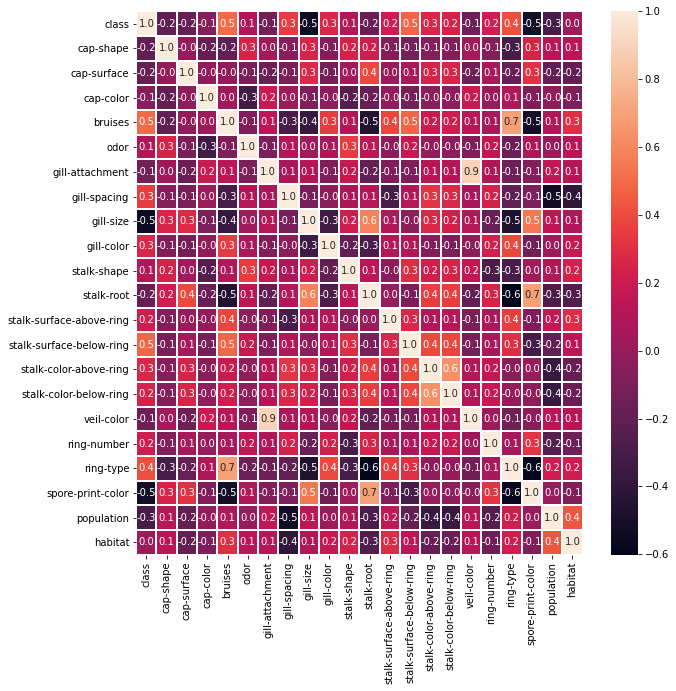

In [ ]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(mushroom.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax) #heatmap to help visualize correlation between the various entities

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


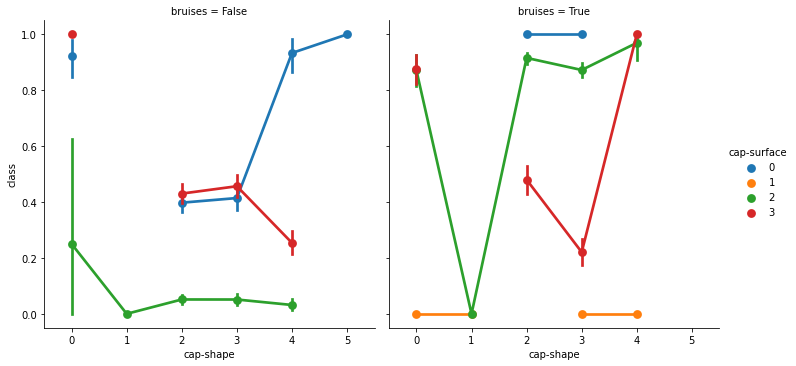

In [ ]:
# line chart
sns.factorplot("cap-shape", "class", hue="cap-surface", col="bruises",data=mushroom, order=[0, 1,2, 3,4,5]) #refer to encoding deck to understand the order


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


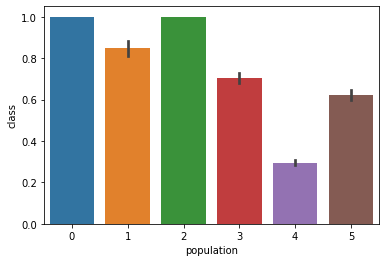

In [ ]:
#bar chart
sns.barplot("population", "class", data=mushroom,order=[0,1,2,3,4,5]);

In [ ]:
drop_list=['habitat','odor','gill-attachment','stalk-shape','veil-color','ring-number','cap-surface','stalk-surface-above-ring','stalk-color-below-ring','stalk-root'] #remving entities which have very less correlation with target label

mushroom = mushroom.drop(columns=drop_list)

In [ ]:
drop_list=['cap-color','cap-shape'] #also not relevant entities
mushroom = mushroom.drop(columns=drop_list)

#Build and  Train Model

In [ ]:
X_train = mushroom.drop("class", axis=1)
Y_train = mushroom["class"]

#dividing the data and label class for training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#libraries for 5 ML algorithms


from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#accuracy of train and validation set are analysed

#Logistic Regression

In [ ]:
# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)


lr = LogisticRegression() #create the object of the model  #hyperparameters are kept default
lr = lr.fit(x_train,y_train)# whole training, forward+backp
act = accuracy_score(y_train,lr.predict(x_train))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  89.48294055575097


In [ ]:
act1 = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  90.21538461538462


In [ ]:
pc= precision_score(y_test,lr.predict(x_test))
print('precision score is: ',(pc*100))
rc= recall_score(y_test,lr.predict(x_test))
print('recall score is: ',(rc*100))
f1= f1_score(y_test,lr.predict(x_test))
print('f1 score is: ',(f1*100))

precision score is:  88.96
recall score is:  89.1025641025641
f1 score is:  89.03122497998397


#Random Forest Classifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   #hyperparamaters are optimised
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
clr_rf = clf_rf.fit(x_train,y_train)
act = accuracy_score(y_train,clf_rf.predict(x_train))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  99.63067182553641


In [ ]:
act1 = accuracy_score(y_test,clr_rf.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  99.38474159146841


In [ ]:
pc= precision_score(y_test,clr_rf.predict(x_test))
print('precision score is: ',(pc*100))
rc= recall_score(y_test,clr_rf.predict(x_test))
print('recall score is: ',(rc*100))
f1= f1_score(y_test,clr_rf.predict(x_test))
print('f1 score is: ',(f1*100))

precision score is:  99.22360248447205
recall score is:  99.61028838659392
f1 score is:  99.41656942823805


#Decision Tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
decision_tree = DecisionTreeClassifier()  #hyperparameters are kept default
decision_tree.fit(x_train, y_train)
act = accuracy_score(y_train,decision_tree.predict(x_train))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  99.54273654590222


In [ ]:
act1 = accuracy_score(y_test,decision_tree.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  99.58982772764561


In [ ]:
pc= precision_score(y_test,decision_tree.predict(x_test))
print('precision score is: ',(pc*100))
rc= recall_score(y_test,decision_tree.predict(x_test))
print('recall score is: ',(rc*100))
f1= f1_score(y_test,decision_tree.predict(x_test))
print('f1 score is: ',(f1*100))

precision score is:  99.67558799675588
recall score is:  99.51417004048582
f1 score is:  99.59481361426256


#KNeighbour Classification

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
kmodel = KNeighborsClassifier(n_neighbors = 8)
kmodel.fit(x_train, y_train)
act = accuracy_score(y_train,kmodel.predict(x_train))
print('Train Accuracy is: ',(act*100))


Train Accuracy is:  99.59549771368273


In [ ]:
act1 = accuracy_score(y_test,kmodel.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  99.4667760459393


In [ ]:
pc= precision_score(y_test,kmodel.predict(x_test))
print('precision score is: ',(pc*100))
rc= recall_score(y_test,kmodel.predict(x_test))
print('recall score is: ',(rc*100))
f1= f1_score(y_test,kmodel.predict(x_test))
print('f1 score is: ',(f1*100))

precision score is:  99.28343949044586
recall score is:  99.6802557953637
f1 score is:  99.48145193458318


In [ ]:
#Parameter tuning
training_accuracy = []
testing_accuracy = []
for i in range(1,15):
  kms = KNeighborsClassifier(n_neighbors = i)
  kms.fit(x_train,y_train)
  
  training_acc = accuracy_score(y_train,kmodel.predict(x_train))


  testing_acc = accuracy_score(y_test,kmodel.predict(x_test))

  training_accuracy.append(training_acc)
  testing_accuracy.append(testing_acc)

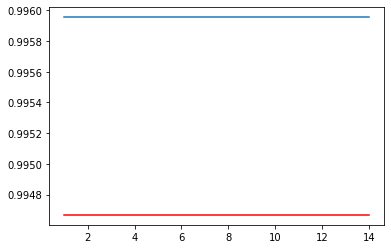

In [ ]:
plt.plot(range(1,15) , training_accuracy)
plt.plot(range(1,15) , testing_accuracy , c='red')
plt.show()

#Support Vector Machine

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)
clf = svm.SVC() 

clf.fit(x_train, y_train)
act = accuracy_score(y_train,clf.predict(x_train))
print('Train Accuracy is: ',(act*100))

Train Accuracy is:  97.56885674719187


In [ ]:
act1 = accuracy_score(y_test,clf.predict(x_test))
print('Test Accuracy is: ',(act1*100))

Test Accuracy is:  97.29230769230769


In [ ]:
pc= precision_score(y_test,clf.predict(x_test))
print('precision score is: ',(pc*100))
rc= recall_score(y_test,clf.predict(x_test))
print('recall score is: ',(rc*100))
f1= f1_score(y_test,clf.predict(x_test))
print('f1 score is: ',(f1*100))

precision score is:  99.88109393579072
recall score is:  95.13023782559456
f1 score is:  97.44779582366588


#Visualizing and Comparing the accuracies of different ML models 

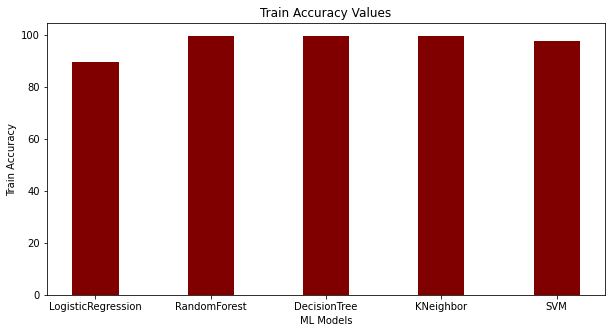

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'LogisticRegression':89.48, 'RandomForest':99.63, 'DecisionTree':99.54,
        'KNeighbor':99.59, 'SVM':97.56}
Models = list(data.keys())
TrainAcc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models,TrainAcc,color ='maroon',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Values")
plt.show()

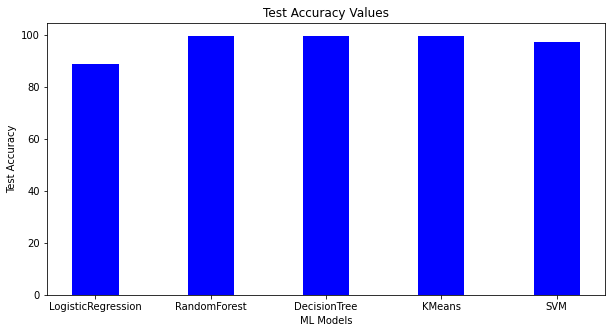

In [ ]:

data1 = {'LogisticRegression':88.76, 'RandomForest':99.38, 'DecisionTree':99.58,
        'KMeans':99.46, 'SVM':97.29}
Models = list(data1.keys())
TestAcc = list(data1.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models,TestAcc,color ='blue',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Values")
plt.show()